In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_2746bbf739a64b23a74020a9141e0c77 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RX6ADraaIfosel3oRg2lCLRJdsJZ-6RIb0nt7VE2ffJN',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2746bbf739a64b23a74020a9141e0c77.get_object(Bucket='mlmodel1-donotdelete-pr-unqry7kdcop1l5',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset= pd.read_csv(body)
dataset.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


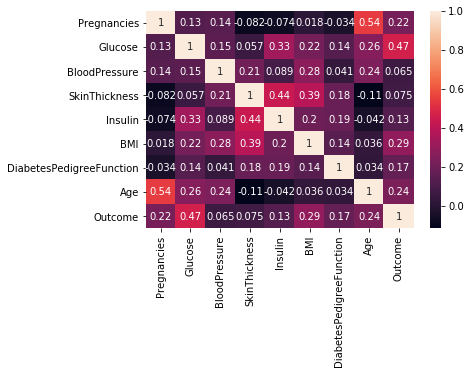

In [7]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [8]:
dataset['Diabetes']=dataset['Outcome']

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


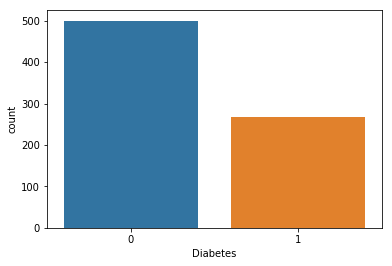

In [9]:
import seaborn as sns
sns.countplot(dataset['Diabetes'],label="Count")

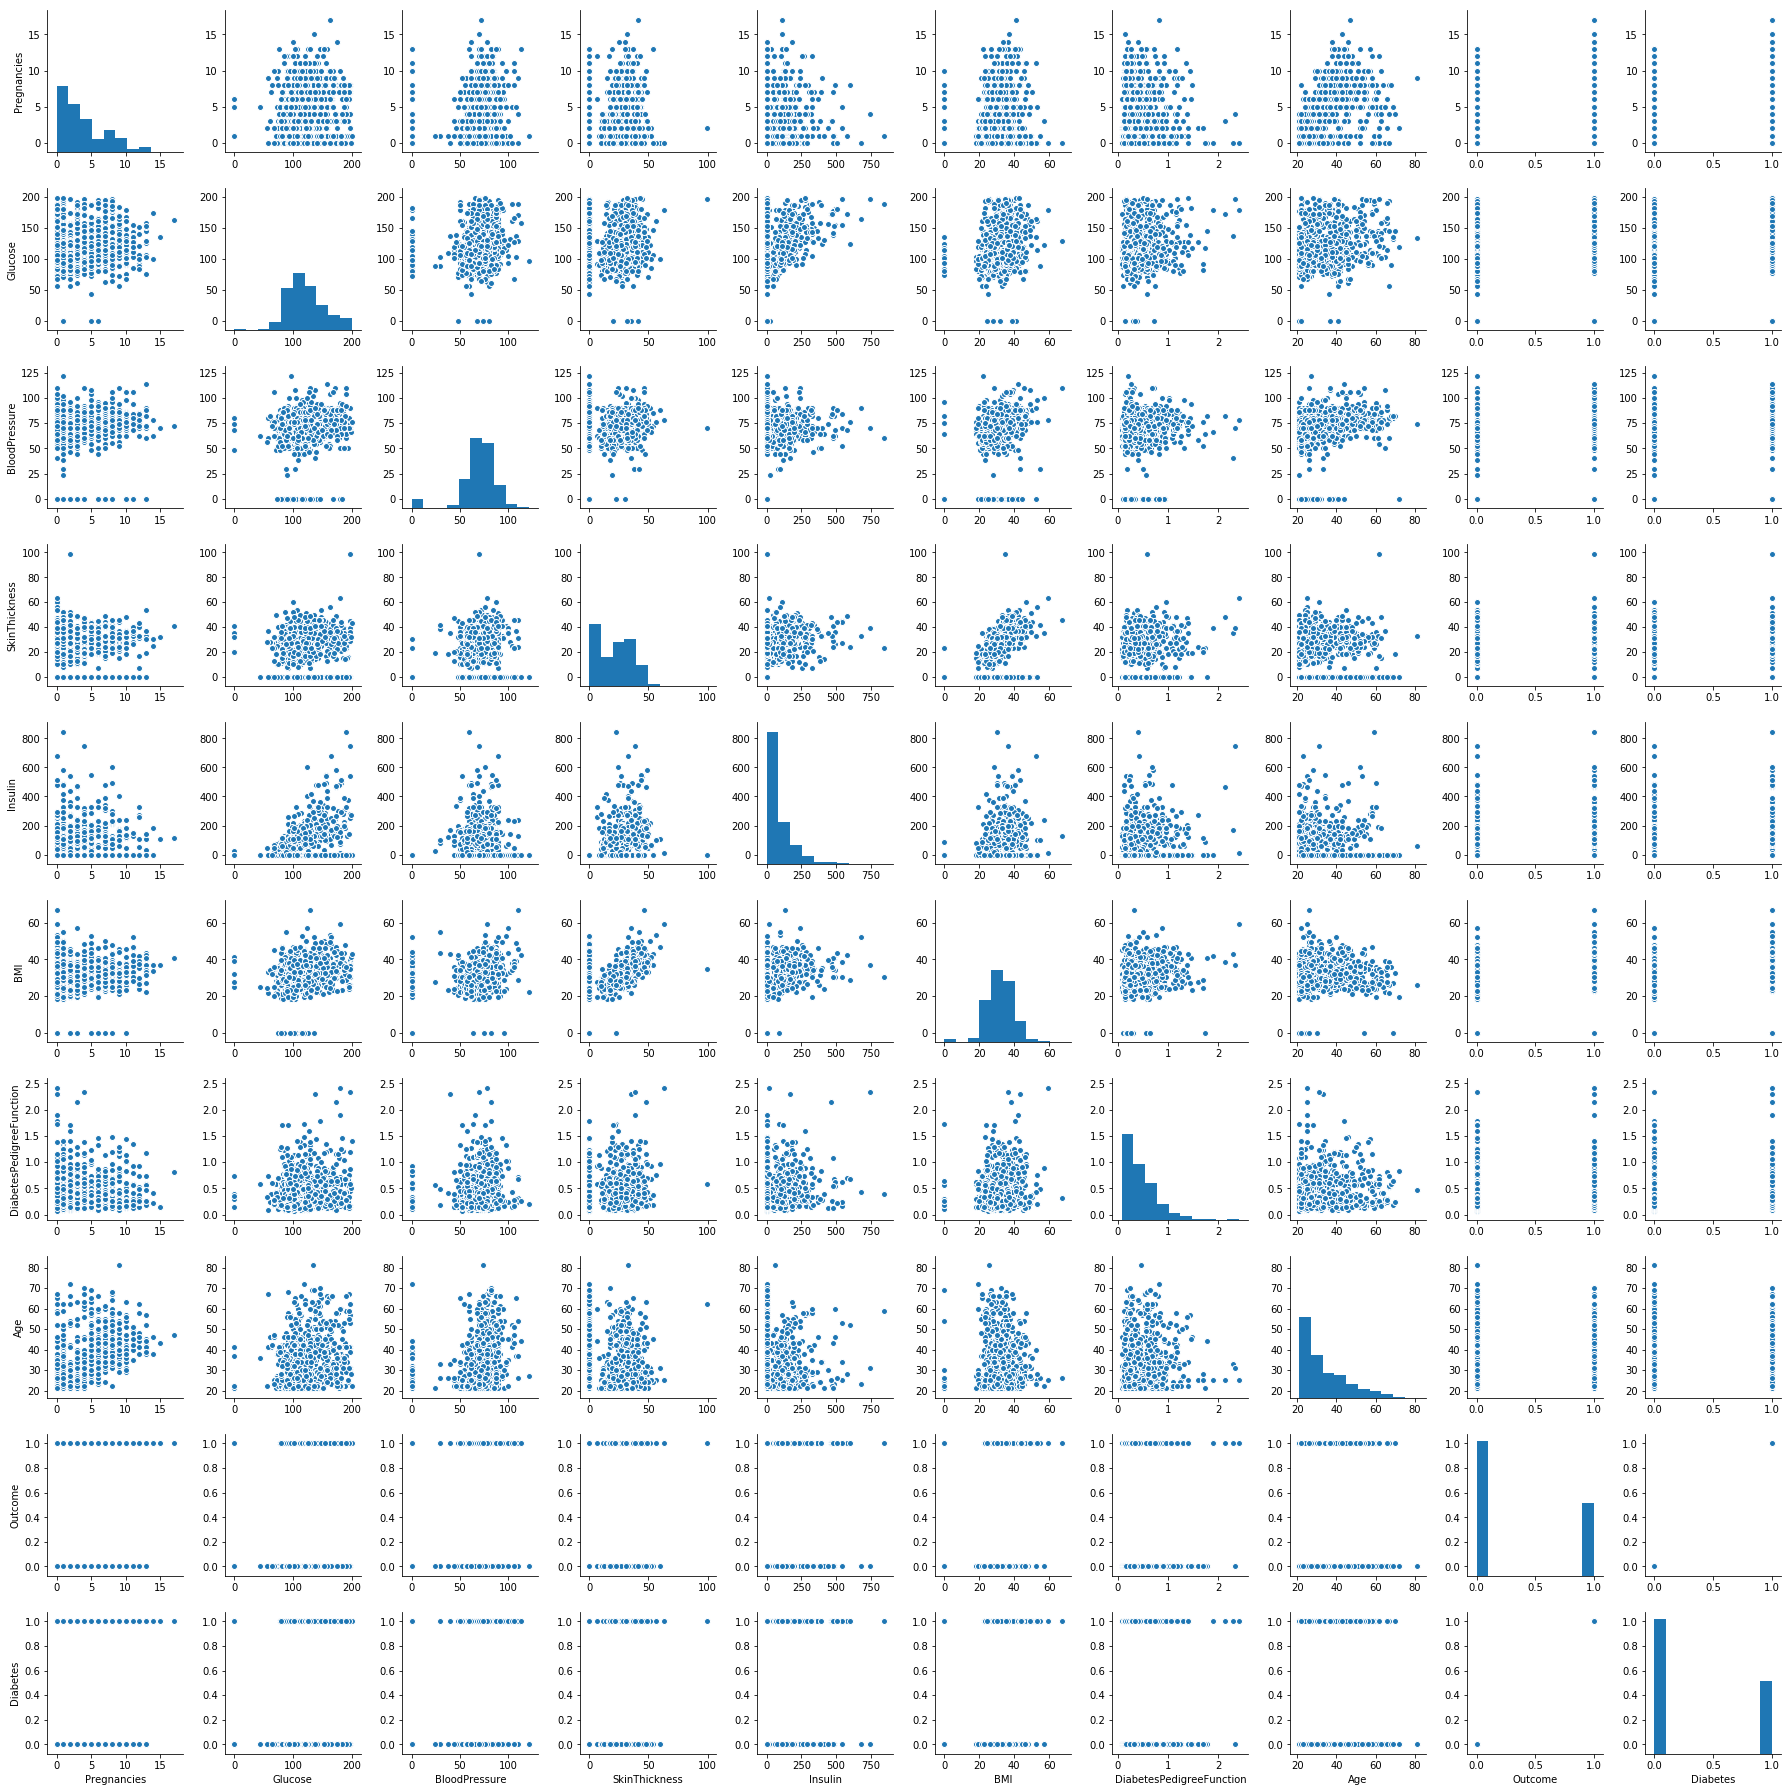

In [10]:
sns.pairplot(dataset)

In [11]:
x=dataset.iloc[:,0:8].values

In [12]:
x

array([[   6.   ,  148.   ,   72.   , ...,   33.6  ,    0.627,   50.   ],
       [   1.   ,   85.   ,   66.   , ...,   26.6  ,    0.351,   31.   ],
       [   8.   ,  183.   ,   64.   , ...,   23.3  ,    0.672,   32.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,   26.2  ,    0.245,   30.   ],
       [   1.   ,  126.   ,   60.   , ...,   30.1  ,    0.349,   47.   ],
       [   1.   ,   93.   ,   70.   , ...,   30.4  ,    0.315,   23.   ]])

In [13]:
y=dataset.iloc[:,8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1,

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train

array([[  7.00000000e+00,   1.50000000e+02,   7.80000000e+01, ...,
          3.52000000e+01,   6.92000000e-01,   5.40000000e+01],
       [  4.00000000e+00,   9.70000000e+01,   6.00000000e+01, ...,
          2.82000000e+01,   4.43000000e-01,   2.20000000e+01],
       [  0.00000000e+00,   1.65000000e+02,   9.00000000e+01, ...,
          5.23000000e+01,   4.27000000e-01,   2.30000000e+01],
       ..., 
       [  4.00000000e+00,   9.40000000e+01,   6.50000000e+01, ...,
          2.47000000e+01,   1.48000000e-01,   2.10000000e+01],
       [  1.10000000e+01,   8.50000000e+01,   7.40000000e+01, ...,
          3.01000000e+01,   3.00000000e-01,   3.50000000e+01],
       [  5.00000000e+00,   1.36000000e+02,   8.20000000e+01, ...,
          0.00000000e+00,   6.40000000e-01,   6.90000000e+01]])

In [17]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [18]:
x_test

array([[  1.00000000e+00,   1.99000000e+02,   7.60000000e+01, ...,
          4.29000000e+01,   1.39400000e+00,   2.20000000e+01],
       [  2.00000000e+00,   1.07000000e+02,   7.40000000e+01, ...,
          3.36000000e+01,   4.04000000e-01,   2.30000000e+01],
       [  4.00000000e+00,   7.60000000e+01,   6.20000000e+01, ...,
          3.40000000e+01,   3.91000000e-01,   2.50000000e+01],
       ..., 
       [  4.00000000e+00,   1.42000000e+02,   8.60000000e+01, ...,
          4.40000000e+01,   6.45000000e-01,   2.20000000e+01],
       [  3.00000000e+00,   1.16000000e+02,   7.40000000e+01, ...,
          2.63000000e+01,   1.07000000e-01,   2.40000000e+01],
       [  1.00000000e+00,   1.07000000e+02,   7.20000000e+01, ...,
          3.08000000e+01,   8.21000000e-01,   2.40000000e+01]])

In [19]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
sc=MinMaxScaler()

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

rf=LogisticRegression()



In [23]:
from sklearn.pipeline import Pipeline

In [24]:
pipeline=Pipeline([('scaler',sc),('Logistic',rf)])

In [25]:
model=pipeline.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

from sklearn.metrics import accuracy_score
print("AccuracyScore: ",accuracy_score(y_test,y_pred)*100,"%")


AccuracyScore:  80.5194805195 %


In [26]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-07-01 07:15:50,365 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2019-07-01 07:15:53,875 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"fcd60f17c4c7b8631e4d811fca2c521a","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [27]:
wml_credentials={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "access_key":"wzCi9HSHuxrwFlTRo75bHoSQybUUwok6fp0g0du7ryaQ",
    "username":"1f298413-b0b1-4c18-a054-1f94e78603d3",
    "password":"f3c9318d-cdb6-4414-a4eb-531ce72035fc",
    "instance_id":"14680600-a035-4dd0-a195-c6ffda1288e8"
    
    
}

In [28]:
#Initialize wml client library
client=WatsonMachineLearningAPIClient(wml_credentials)

In [29]:
#specify metadata of a model
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"MADHUMITHA",
  client.repository.ModelMetaNames.AUTHOR_EMAIL:"madhumithamb17@gmail.com",
  client.repository.ModelMetaNames.NAME:"Diabetes Prediction"
    
}

In [30]:
#save the model in WML repository
model_s=client.repository.store_model(model,meta_props=model_props)

In [31]:
client.repository.list()

------------------------------------  -------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                 CREATED                   FRAMEWORK          TYPE
d0e37cf2-593d-4122-8c31-bb2f13e065f8  Diabetes Prediction  2019-07-01T07:15:50.507Z  scikit-learn-0.19  model
44a438a7-48aa-4bda-835c-0bbae8e04bab  Diabetes Prediction  2019-06-29T06:41:27.090Z  scikit-learn-0.19  model
325bedaf-b948-4ee0-99f9-78648827417d  Titanic              2019-06-27T11:09:07.616Z  scikit-learn-0.19  model
822493d3-543a-4659-81ac-3e212935bbf3  Titanic              2019-06-27T10:06:02.893Z  scikit-learn-0.19  model
6a3805f4-ef75-488f-b1a9-e3c64db02141  Diabetes Prediction  2019-06-27T09:16:23.420Z  scikit-learn-0.19  model
8f2d7523-e178-49e7-9e33-0e05077c5754  Titanic              2019-06-27T08:40:34.361Z  scikit-learn-0.19  model
8134b2c1-d7f6-4962-95c3-08edfaf4eba8  Diabetes Prediction  2019-06-27T07:13:21.092Z  scikit-learn-0.19  model

In [32]:
#Get ML model uid
published_model_uid=client.repository.get_model_uid(model_s) #model_s:instance
published_model_uid

'd0e37cf2-593d-4122-8c31-bb2f13e065f8'

In [36]:
client.deployments.list()

------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
d5c047de-8390-4093-8282-9ac563e47178  Diabetes Prediction  online  DEPLOY_SUCCESS  2019-06-29T06:49:10.696Z  scikit-learn-0.19  model
484856eb-bf18-42f1-9738-fe4a25746324  Titanic              online  DEPLOY_SUCCESS  2019-06-27T11:12:10.269Z  scikit-learn-0.19  model
46d83ae1-e3ae-4b3d-9c04-cb42ed7cf286  Diabetes Prediction  online  DEPLOY_SUCCESS  2019-06-27T09:17:45.807Z  scikit-learn-0.19  model
026ae0d7-7811-4484-a658-a45d6559596e  Diabetes Prediction  online  DEPLOY_SUCCESS  2019-06-27T07:18:00.122Z  scikit-learn-0.19  model
bf1a4c03-cb6e-4a0f-b0db-0e6acff4cf1a  Profit Prediction    online  DEPLOY_SUCCESS  2019-06-26T10:56:50.509Z  scikit-learn-0.19  model
------------------------------------  --------

In [37]:
client.deployments.delete('d5c047de-8390-4093-8282-9ac563e47178')

'SUCCESS'

In [38]:
#Deployment as web service
d=client.deployments.create(published_model_uid,name="Diabetes Prediction")




#######################################################################################

Synchronous deployment creation for uid: 'd0e37cf2-593d-4122-8c31-bb2f13e065f8' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='211f38bc-bb4f-4e0d-b0e8-bf9b71cba952'
------------------------------------------------------------------------------------------------




In [39]:
#Getting url for ml model
scoring_endpoint=client.deployments.get_scoring_url(d)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/14680600-a035-4dd0-a195-c6ffda1288e8/deployments/211f38bc-bb4f-4e0d-b0e8-bf9b71cba952/online'

In [40]:
import matplotlib.pyplot as plt

In [42]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

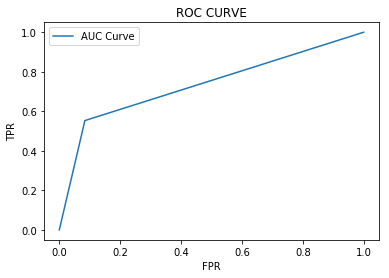

In [43]:
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.plot(fpr,tpr,label="AUC Curve")
plt.legend()